In [17]:
%matplotlib inline
import pandas as pd
import warnings
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels as sm
import six

In [11]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [12]:
url = "clust_data_nextbike_2020-07.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

In [14]:
df.head()

lat_begin  lng_begin    lat_end   lng_end                  ride_begin  \
0  50.921618   6.933237  50.913049  6.922490  2020-07-01 09:31:02.322428   
1  50.913049   6.922490  50.910794  6.941967  2020-07-01 10:35:02.336121   
2  50.910794   6.941967  50.931395  6.918226  2020-07-01 11:32:02.897704   
3  50.931395   6.918226  50.929816  6.913806  2020-07-01 12:03:01.601807   
4  50.929816   6.913806  50.929823  6.913615  2020-07-01 17:59:02.213975   

                     ride_end  ride_time_minutes  distance  uid_begin  \
0  2020-07-01 09:49:01.995455               18.0    1215.0   31804315   
1  2020-07-01 10:44:02.333799                9.0    1389.0   31819860   
2  2020-07-01 11:55:01.902627               23.0    2832.0   31821838   
3  2020-07-01 12:24:02.273590               21.0     356.0   31824497   
4  2020-07-01 18:05:02.088433                6.0      13.0   31825694   

    uid_end  standing_before_ride address        name  
0  31819860                 571.0     NaN  BIKE 22933  
1  31821838                  46.0     NaN  BIKE 22933  
2  31824497                  48.0     NaN  BIKE 22933  
3  31825694                   8.0     NaN  BIKE 22933  
4  31843292                 335.0     NaN  BIKE 22933

In [31]:
def render_mpl_table(data, col_width=3.0, row_height=1, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [34]:
df_copy = df.copy()

In [37]:
df_copy.drop('address',1).head()

lat_begin  lng_begin    lat_end   lng_end                  ride_begin  \
0  50.921618   6.933237  50.913049  6.922490  2020-07-01 09:31:02.322428   
1  50.913049   6.922490  50.910794  6.941967  2020-07-01 10:35:02.336121   
2  50.910794   6.941967  50.931395  6.918226  2020-07-01 11:32:02.897704   
3  50.931395   6.918226  50.929816  6.913806  2020-07-01 12:03:01.601807   
4  50.929816   6.913806  50.929823  6.913615  2020-07-01 17:59:02.213975   

                     ride_end  ride_time_minutes  distance  uid_begin  \
0  2020-07-01 09:49:01.995455               18.0    1215.0   31804315   
1  2020-07-01 10:44:02.333799                9.0    1389.0   31819860   
2  2020-07-01 11:55:01.902627               23.0    2832.0   31821838   
3  2020-07-01 12:24:02.273590               21.0     356.0   31824497   
4  2020-07-01 18:05:02.088433                6.0      13.0   31825694   

    uid_end  standing_before_ride        name  
0  31819860                 571.0  BIKE 22933  
1  31821838                  46.0  BIKE 22933  
2  31824497                  48.0  BIKE 22933  
3  31825694                   8.0  BIKE 22933  
4  31843292                 335.0  BIKE 22933

<AxesSubplot:>

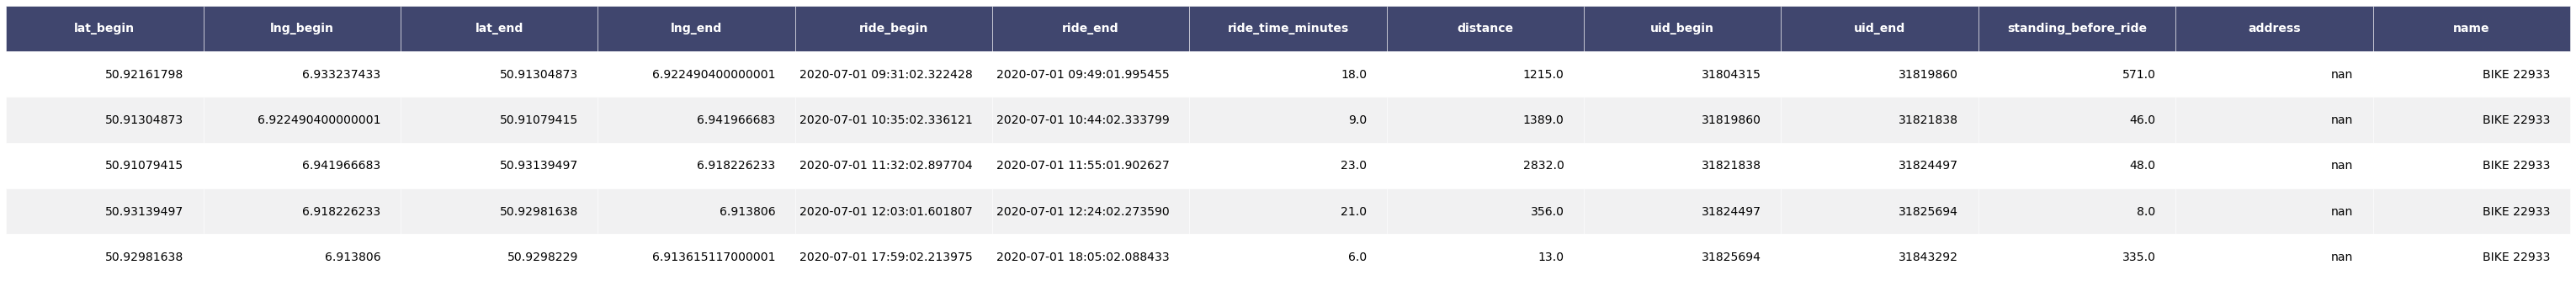

In [38]:
render_mpl_table(df_copy.head(5), header_columns=0, col_width=4.2)

In [18]:
df[df['ride_time_minutes'] < 5]

lat_begin  lng_begin    lat_end   lng_end                  ride_begin  \
8      50.927878   6.908989  50.928780  6.914153  2020-07-01 22:11:03.084599   
9      50.928780   6.914153  50.928696  6.913970  2020-07-02 19:14:02.079544   
12     50.951629   6.911414  50.951597  6.914604  2020-07-02 20:56:02.738080   
28     50.927536   6.948705  50.929144  6.950948  2020-07-25 17:18:02.897790   
35     50.936354   6.954177  50.936100  6.952745  2020-07-02 10:29:02.413969   
...          ...        ...        ...       ...                         ...   
68248  50.925561   6.973484  50.927325  6.972494  2020-07-23 21:47:03.389360   
68249  50.927325   6.972494  50.934000  6.969738  2020-07-23 21:52:02.445726   
68250  50.934000   6.969738  50.936060  6.969032  2020-07-23 21:53:02.634298   
68251  50.936060   6.969032  50.940159  6.968739  2020-07-23 21:56:02.986457   
68252  50.940159   6.968739  50.941765  6.968717  2020-07-23 21:57:01.736997   

                         ride_end  ride_time_minutes  distance  uid_begin  \
8      2020-07-01 22:15:02.192482                4.0     376.0   31856891   
9      2020-07-02 19:16:02.319529                2.0      16.0   31858979   
12     2020-07-02 21:00:01.851068                4.0     224.0   31905111   
28     2020-07-25 17:21:02.621497                3.0     238.0   33131683   
35     2020-07-02 10:30:02.227515                1.0     104.0   31873988   
...                           ...                ...       ...        ...   
68248  2020-07-23 21:48:03.978368                1.0     208.0   33035315   
68249  2020-07-23 21:53:02.634298                1.0     767.0   33035364   
68250  2020-07-23 21:54:02.952433                1.0     234.0   33035651   
68251  2020-07-23 21:57:01.736997                1.0     456.0   33035698   
68252  2020-07-23 21:58:03.017816                1.0     179.0   33035835   

        uid_end  standing_before_ride address        name  
8      31858979                  37.0     NaN  BIKE 22933  
9      31901420                1259.0     NaN  BIKE 22933  
12     31907292                  39.0     NaN  BIKE 22933  
28     33134202                  38.0     NaN  BIKE 22933  
35     31875126                   0.0     NaN  BIKE 21509  
...         ...                   ...     ...         ...  
68248  33035364                   0.0     NaN  BIKE 21885  
68249  33035651                   4.0     NaN  BIKE 21885  
68250  33035698                   0.0     NaN  BIKE 21885  
68251  33035835                   2.0     NaN  BIKE 21885  
68252  33035890                   0.0     NaN  BIKE 21885  

[7968 rows x 13 columns]

In [23]:
df[df['distance'] > 10000.0 ]

lat_begin  lng_begin    lat_end   lng_end                  ride_begin  \
1514   50.921623   6.848214  50.959302  7.011294  2020-07-27 19:19:02.494868   
3032   50.869603   7.042540  50.927021  6.929603  2020-07-15 14:15:03.749523   
3455   50.957611   6.994908  50.845829  6.857507  2020-07-26 13:15:02.424204   
3456   50.845829   6.857507  50.961427  6.984301  2020-07-26 16:14:02.053080   
4828   50.924565   7.009012  50.938184  6.830792  2020-07-22 22:51:02.520372   
...          ...        ...        ...       ...                         ...   
62014  50.918690   6.978181  51.000190  6.914715  2020-07-18 03:32:02.363964   
62426  51.000691   6.852282  50.925476  6.939468  2020-07-06 00:10:02.027670   
62976  51.021221   6.930184  50.921659  6.933723  2020-07-31 19:21:02.715737   
66873  50.945713   6.910786  50.892946  7.030835  2020-07-31 15:36:03.630298   
68005  50.958289   6.940695  50.870947  7.041274  2020-07-18 11:16:02.802916   

                         ride_end  ride_time_minutes  distance  uid_begin  \
1514   2020-07-27 22:14:03.332023              175.0   12174.0   33212708   
3032   2020-07-15 16:09:02.197528              114.0   10176.0   32550452   
3455   2020-07-26 15:00:02.639368              105.0   15732.0   33173211   
3456   2020-07-26 18:12:02.323739              118.0   15634.0   33179009   
4828   2020-07-22 22:52:02.789674                1.0   12585.0   32961844   
...                           ...                ...       ...        ...   
62014  2020-07-18 04:47:02.893836               75.0   10097.0   32703205   
62426  2020-07-06 00:20:01.542209               10.0   10359.0   32073694   
62976  2020-07-31 20:30:02.978510               69.0   11077.0   33484342   
66873  2020-07-31 16:34:02.934136               58.0   10262.0   33463550   
68005  2020-07-23 06:53:02.300626             6937.0   12006.0   32709732   

        uid_end  standing_before_ride         address        name  
1514   33249884                 628.0             NaN  BIKE 22049  
3032   32557852                  40.0             NaN  BIKE 21589  
3455   33179009                  31.0             NaN  BIKE 21960  
3456   33187888                  74.0             NaN  BIKE 21960  
4828   32978163                 238.0             NaN  BIKE 21849  
...         ...                   ...             ...         ...  
62014  32705011                  53.0             NaN  BIKE 22032  
62426  32075006                  44.0  Lindenstraße 1  BIKE 21913  
62976  33489826                   0.0             NaN  BIKE 22360  
66873  33472432                  92.0             NaN  BIKE 21063  
68005  32719074                  70.0             NaN  BIKE 22087  

[80 rows x 13 columns]